### Notes and questions from chapter 10

* Discuss page 283 example.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X = iris.data[:,(2,3)] # petal length and width
y = (iris.target == 0).astype(np.int)

In [3]:
per_clf = Perceptron()
per_clf.fit(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
y_pred = per_clf.predict([[2,5]])

In [5]:
y_pred

array([0])

In [6]:
import tensorflow as tf
from tensorflow import keras


In [7]:
tf.__version__

'2.1.0'

In [8]:
keras.__version__

'2.2.4-tf'

In [9]:
fashion_mnist = keras.datasets.fashion_mnist

In [10]:
(x_train_full, y_train_full),(x_test,y_test) = fashion_mnist.load_data()

In [11]:
x_train_full.shape

(60000, 28, 28)

In [12]:
x_train_full.dtype

dtype('uint8')

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mlp

In [14]:
class_names = ["T-shirt/Top","Trouser", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker"
               ,"Bag","Ankle Boot"]

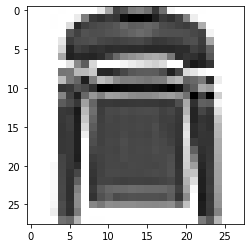

In [15]:
plt.imshow(x_train_full[5], cmap = mlp.cm.binary)

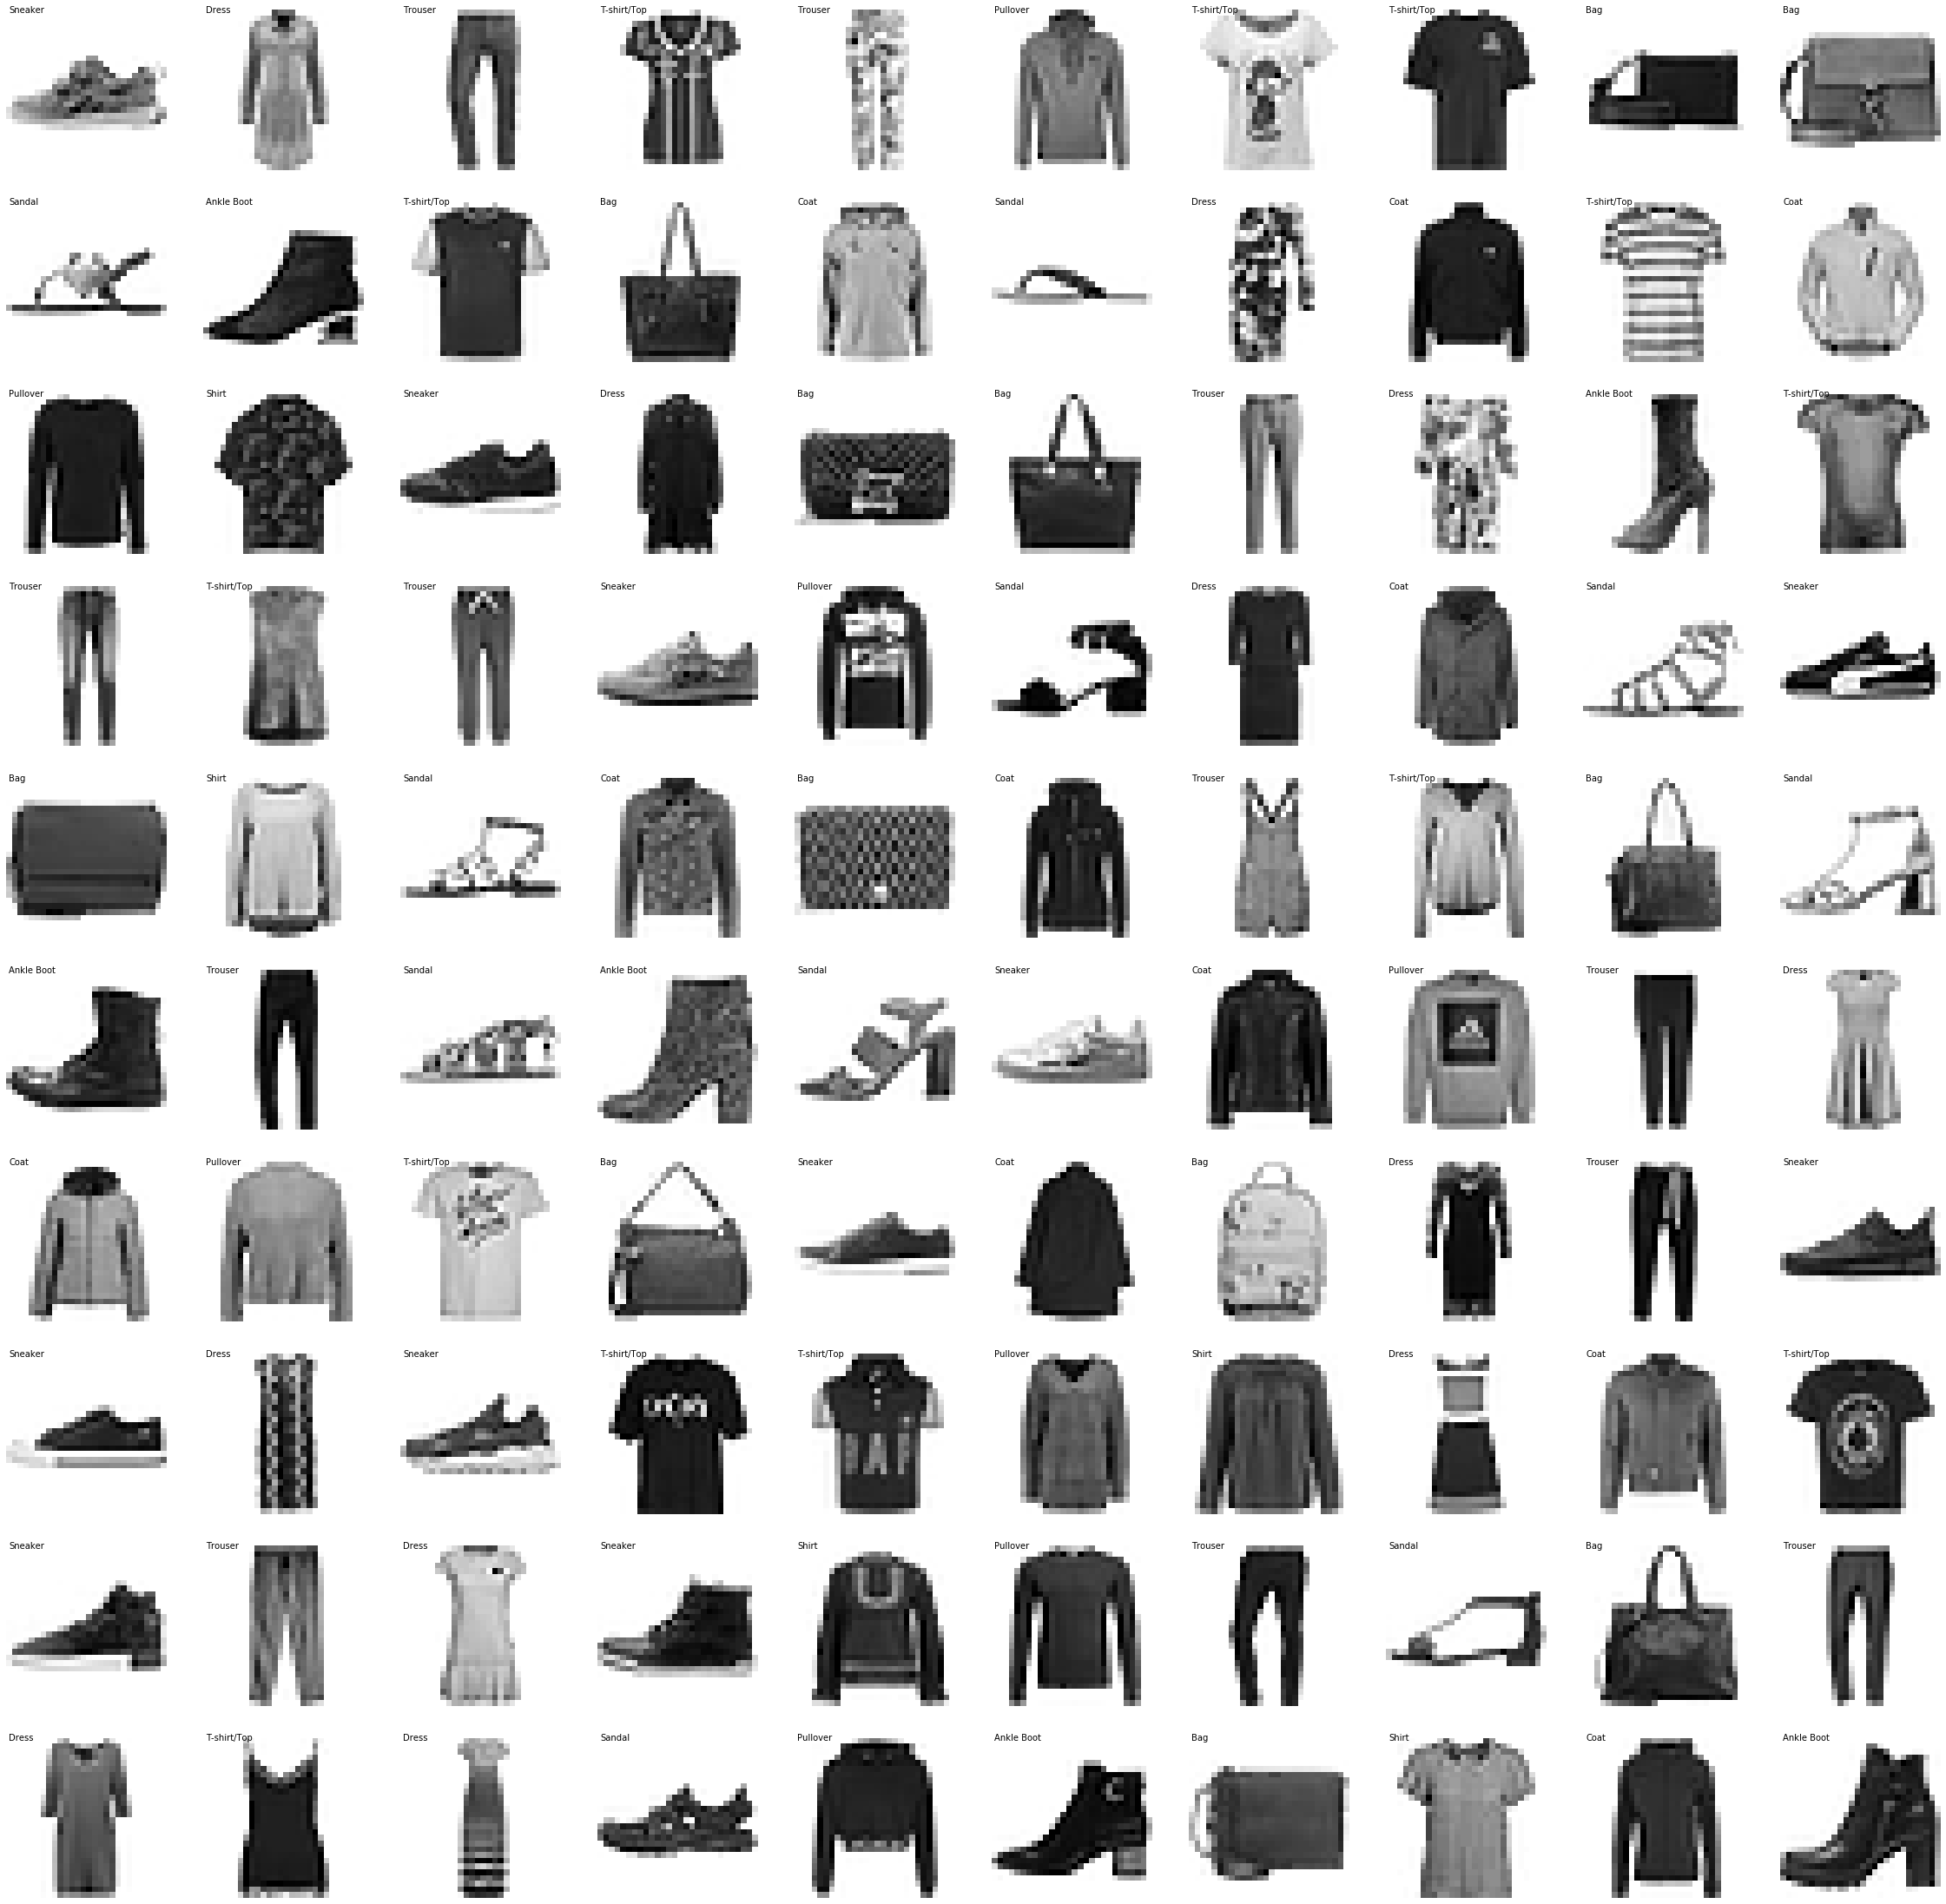

In [16]:
fig=plt.figure(figsize=(40, 40))
offset = 40000
for index in range (offset+1,offset+101):
    some_image = x_train_full [index]
    #some_digit_image = some_digit.reshape(28,28)
    fig.add_subplot(10, 10, index-offset )
    plt.imshow(some_image, cmap = mlp.cm.binary, interpolation  = 'nearest')
    plt.text(0,0,class_names[y_train_full[index]])
    plt.axis('off')
plt.show()

In [17]:
X_valid, X_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [18]:
class_names[y_train_full[10]]

'T-shirt/Top'

### Creating a model using the sequential API

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


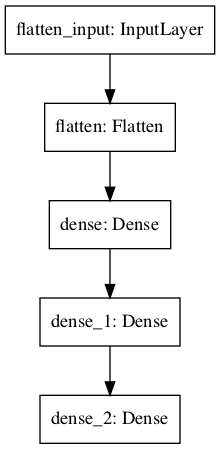

In [21]:
keras.utils.plot_model(model)

In [22]:
model.layers

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics=["accuracy"])

In [24]:
import os

In [25]:
root_log_dir = os.path.join(os.curdir, "my_logs")

In [26]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d_%H_%M_%S")
    return os.path.join(root_log_dir,run_id)


In [27]:
run_log_dir = get_run_logdir()

In [28]:
tensorboard_cb = keras.callbacks.TensorBoard(run_log_dir)

In [29]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid,y_valid), callbacks=[tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 11s 207us/sample - loss: 0.7221 - accuracy: 0.7604 - val_loss: 0.5048 - val_accuracy: 0.8330
Epoch 2/30
55000/55000 [==============================] - 7s 135us/sample - loss: 0.4898 - accuracy: 0.8286 - val_loss: 0.4490 - val_accuracy: 0.8500
Epoch 3/30
55000/55000 [==============================] - 7s 124us/sample - loss: 0.4449 - accuracy: 0.8463 - val_loss: 0.4173 - val_accuracy: 0.8608
Epoch 4/30
55000/55000 [==============================] - 8s 142us/sample - loss: 0.4174 - accuracy: 0.8541 - val_loss: 0.4048 - val_accuracy: 0.8620
Epoch 5/30
55000/55000 [==============================] - 8s 150us/sample - loss: 0.3969 - accuracy: 0.8609 - val_loss: 0.3889 - val_accuracy: 0.8606
Epoch 6/30
55000/55000 [==============================] - 8s 141us/sample - loss: 0.3814 - accuracy: 0.8657 - val_loss: 0.3681 - val_accuracy: 0.8730
Epoch 7/30
55000/55000 [==========================

In [30]:
import pandas as pd


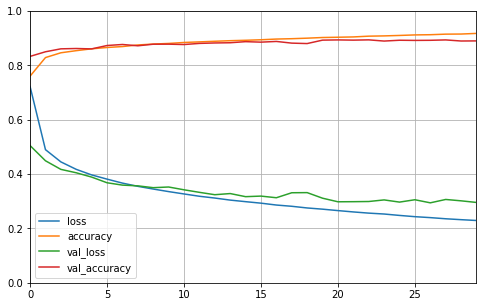

In [31]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [32]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 71us/sample - loss: 57.4256 - accuracy: 0.8535


[57.42564539499283, 0.8535]

In [33]:
import numpy as np

In [34]:
X_new = x_test[:30]
y_proba = model.predict_classes(X_new)
pred_labels = np.array(class_names)[y_proba]

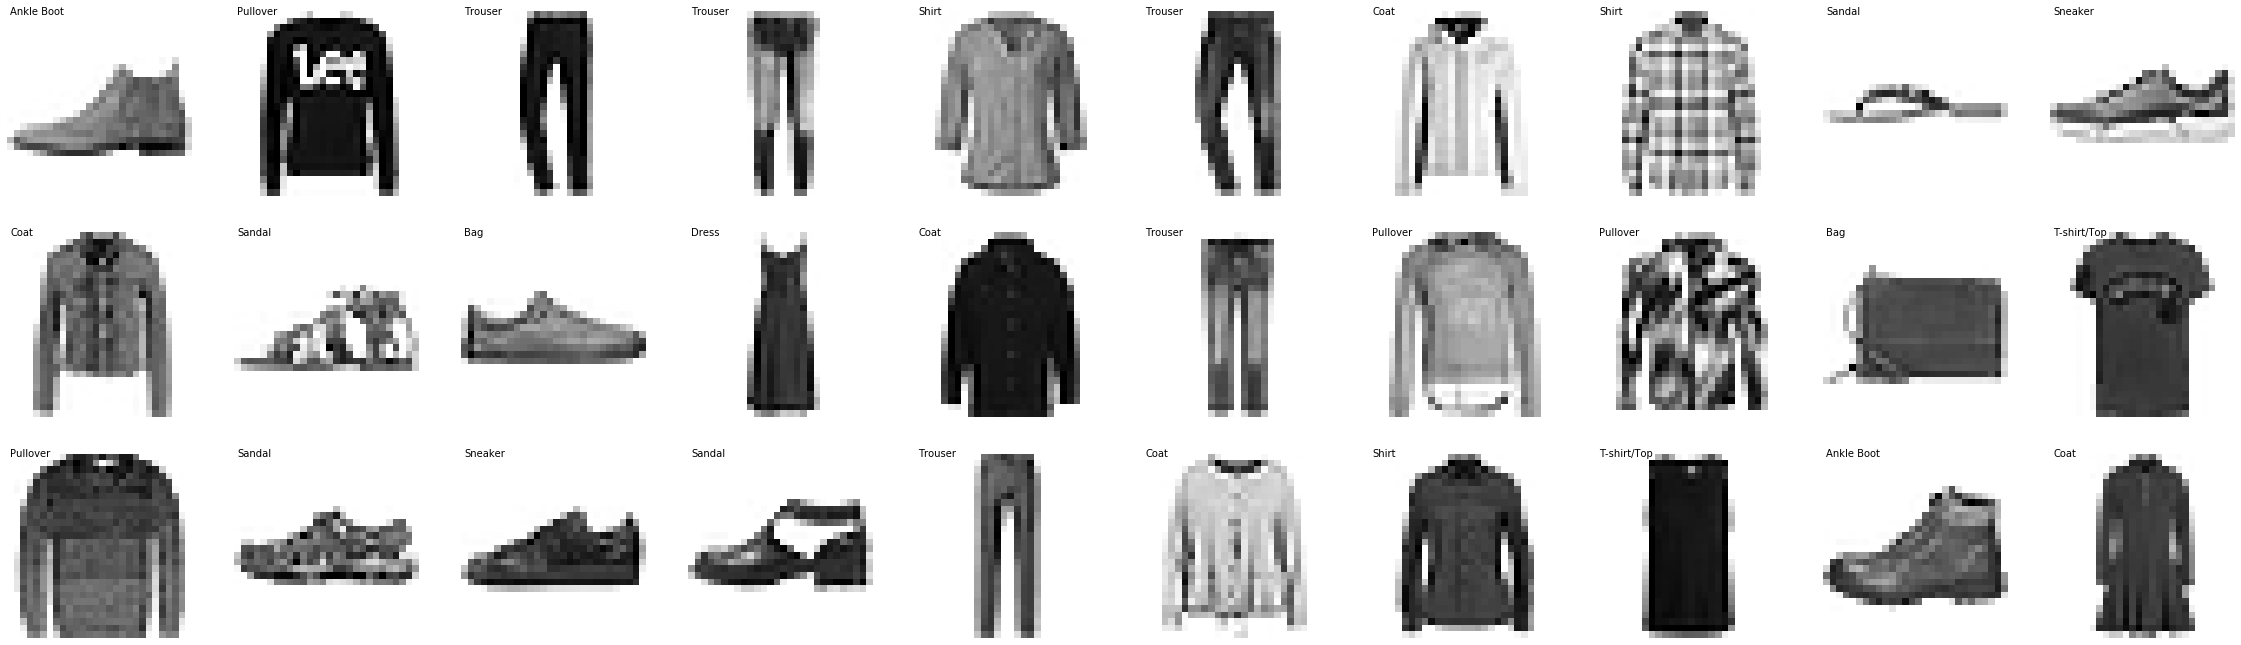

In [35]:
fig=plt.figure(figsize=(40, 40))
offset = 40000
for index in range (X_new.shape[0]):
    some_image = X_new [index]
    #some_digit_image = some_digit.reshape(28,28)
    fig.add_subplot(10, 10, index +1 )
    plt.imshow(some_image, cmap = mlp.cm.binary, interpolation  = 'nearest')
    plt.text(0,0,pred_labels[index])
    plt.axis('off')
plt.show()